In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import io
import warnings

warnings.simplefilter('ignore')

## Drug Consumption Dataset.
### The idea is to predict if a person already used LSD, given some personal information include the use of another drugs or even some addicties that this people have.

#### The original problem is divided in seven class*, but for simplicity we are going to use only two that will be if never used or already used once, represented respectively for 'CL0' and 'CL1'.

###### * -> "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

## <span style="color:blue">The main goal of this activity is to understanding what feature is the most important to the results found and tell why they are important </span>

In [2]:
drug_consumption = pd.read_csv('datasets/drug_consumption.csv')

In [3]:
drug_consumption

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Esctasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [4]:
drug_consumption.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Esctasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [5]:
# drug_consumption = drug_consumption.sample(frac=1).reset_index(drop=True)
X = drug_consumption[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]


In [6]:
Y = drug_consumption[['LSD']]

In [7]:
# print(len(X), len(Y))

In [8]:
Y = Y.where(Y == 'CL0', 'CL1')
Y['LSD'].value_counts()

CL0    1069
CL1     816
Name: LSD, dtype: int64

In [9]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [10]:
clf = ExtraTreesClassifier(n_estimators=250, random_state=0)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
importances = clf.feature_importances_


In [11]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 3 (0.161420)
2. feature 7 (0.111463)
3. feature 11 (0.108409)
4. feature 10 (0.085246)
5. feature 6 (0.085090)
6. feature 5 (0.084507)
7. feature 9 (0.083927)
8. feature 8 (0.083577)
9. feature 2 (0.068841)
10. feature 0 (0.061570)
11. feature 1 (0.040860)
12. feature 4 (0.025091)


In [12]:
other = pd.DataFrame(predicted)
other.columns = ['LSD']
# print(other)
df = x_test
imp = pd.concat([df, other], axis=1)
imp = imp.dropna()

# First
countries = [0.96082, -0.57009]
lsd = ['CL0']
imp1 = imp[(imp.Country.isin(countries)) & (imp.LSD.isin(lsd))]
imp2 = imp[(imp.Country.isin(countries)) & ~(imp.LSD.isin(lsd))]

# Second
imp3 = imp[(imp.LSD.isin(lsd))]
m = np.mean(imp3.filter(items=['Escore']))
imp4 = imp[~(imp.LSD.isin(lsd))]
m2 = np.mean(imp4.filter(items=['Escore']))
print('EscoreAnalysis\nNever used:', m, '\nAlready Used: ', m2)


# Third
pulse = np.mean(imp3.filter(items=['Impulsive']))
not_pulse = np.mean(imp4.filter(items=['Impulsive']))
print('Impulsive Analysis\nNever Used:', pulse, '\nAlready Used:', not_pulse)

EscoreAnalysis
Never used: Escore    0.0043
dtype: float64 
Already Used:  Escore   -0.097074
dtype: float64
Impulsive Analysis
Never Used: Impulsive   -0.643502
dtype: float64 
Already Used: Impulsive   -0.258127
dtype: float64


## Analysis of the importance of the features

### The most important feature is "Country", although it's not a strange thing, 'cause roughly 85% of the people are distributed in just two countries (UK and USA). In this case, 16 were users and 10 not users of LSD.

### The second most important is the "Escore" that stands for the NEO-FFI-R Extraversion, which is one of the five personality traits of the Big Five personality theory. It indicates how outgoing and social a person is. The analysis showed that people whom never used LSD has a higher level of extraversion (0.298, mean) than people that already used (0.142, mean).

### The third one is the "Impulsive", that stands for how impulsive the person is. Just looking for the mean values, it's turn out incomprehensible for us human, because the values are so close, -0.12 to those that never used and -0.10 to those whom used LSD.

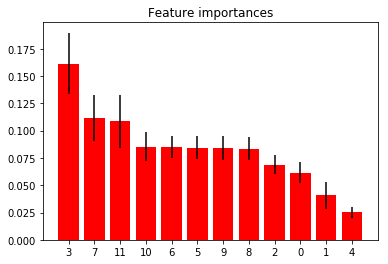

In [13]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_test.shape[1]), indices)
plt.xlim([-1, x_test.shape[1]])
plt.show()

In [14]:
y = y_test.to_numpy()
y2 = y.flatten()
# print(y2)
# p = np.transpose(predicted)
# print(predicted)

In [15]:
score = accuracy_score(y2, predicted)
f1 = f1_score(y2, predicted, average = 'binary', pos_label='CL0')
print(score, f1)

0.7877984084880637 0.8206278026905829


In [16]:
listOfAcc = [score, f1]
listOfMethods = ['score', 'f1']
def plotAverageAcc(listOfAcc, listOfMethods):

    listOfAcc = np.multiply(listOfAcc, 100)

    for l in range(len(listOfAcc)):
        ax = plt.axes()
        ax.bar(l, listOfAcc[l], align='center', width=0.4)

    plt.title("Plots")
    plt.xlabel("Métricas")
    plt.ylabel("Percent")
    plt.yticks(range(0, 101, 10))
    plt.xticks(range(len(listOfAcc)), listOfMethods)
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

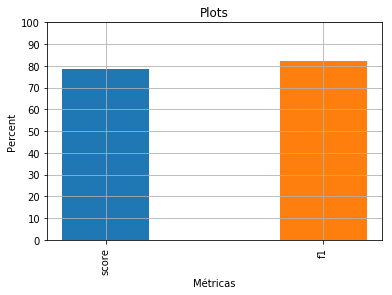

In [17]:
plotAverageAcc(listOfAcc, listOfMethods)